In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [5]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [6]:
dummy

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [7]:
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     702.6
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.07e-38
Time:                        15:45:26   Log-Likelihood:                -62.661
No. Observations:                  50   AIC:                             133.3
Df Residuals:                      46   BIC:                             141.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8310      0.058     14.431      0.000       0.715       0.947
x2             4.2850      0.547      7.836      0.000       3.184       5.386
x3            -0.6670      0.891     -0.749      0.458      -2.460       1.126
const         10.4841      0.298     35.168      0.000       9.884      11.084
==============================================================================
Omnibus:                        1.275   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.230
Skew:                           0.356   Prob(JB):                        0.541
Kurtosis:                       2.714   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
def plot_compare(res):
    pfstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label='True')
    ax.plot(x, res.fittedvalues, 'r--', label='OLS')
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

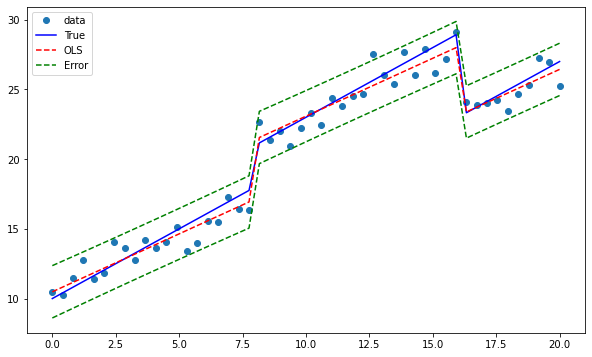

In [9]:
plot_compare(res)